# MARVEL HERO'S ID SEARCH BY NAME

用英雄名字的关键字搜索英雄的id并使用id查询英雄的相关events。

In [1]:
from imp import reload #用于重新加载模块的库
import marvel #这是一个用来专门生成marvel apikey的自定义模块
import requests
from IPython.display import Image
#import time
from hashlib import md5
import json
import os
import re
from pprint import pprint
#reload(marvelkey) #调试模块时需要重新加载模块

marvel.pbkey = 'b429b36ad9c859671f28487a8acdca22'
marvel.pvkey = '10486b67a96262c7c4859f963ae11c36d94352e6'


In [5]:
hero_name = input('Search for :')
search_result = False
with open('hero_dict_n.txt','r') as hero_dict:
    
    hero_dict_j = json.loads(hero_dict.read())
    
    for keys in hero_dict_j['heros_list']:
        #不区分大小写，将re.IGNORECASE传递到search的标志参数
        if re.search(r'.*'+hero_name+'.*',keys['name'],re.IGNORECASE):   
            search_result = True
            print(keys['id'],keys['name'])
if not search_result:
    print('Oops,there is nothing here.')
   

Search for : spider


1011236 Bride of Nine Spiders (Immortal Weapons) 
1011197 Scarlet Spider (Ben Reilly) 
1011426 Scarlet Spider (Kaine) 
1010727 Spider-dok 
1009157 Spider-Girl (Anya Corazon)  
1009609 Spider-Girl (May Parker) May "Mayday" Parker is the daughter of Spider-Man and Mary Jane Watson-Parker. Born with all her fatherï¿½s powers-and the same silly sense of humor-sheï¿½s grown up to become one of Earthï¿½s most trusted heroes and a fitting tribute to her proud papa.
1011347 Spider-Ham (Larval Earth) As Spider-Ham Peter faced such nefarious foes as Ductor Doom, Bull-Frog, Raven the Hunter, Hogzilla, the Buzzard and the King-Pig!
1009610 Spider-Man Bitten by a radioactive spider, high school student Peter Parker gained the speed, strength and powers of a spider. Adopting the name Spider-Man, Peter hoped to start a career using his new abilities. Taught that with great power comes great responsibility, Spidey has vowed to use his powers to help people.
1011054 Spider-Man (1602) 
1014873 Spider-Ma

Hero's ID: 1009157


Searching for events......

Events found: 2
Events got: 2 



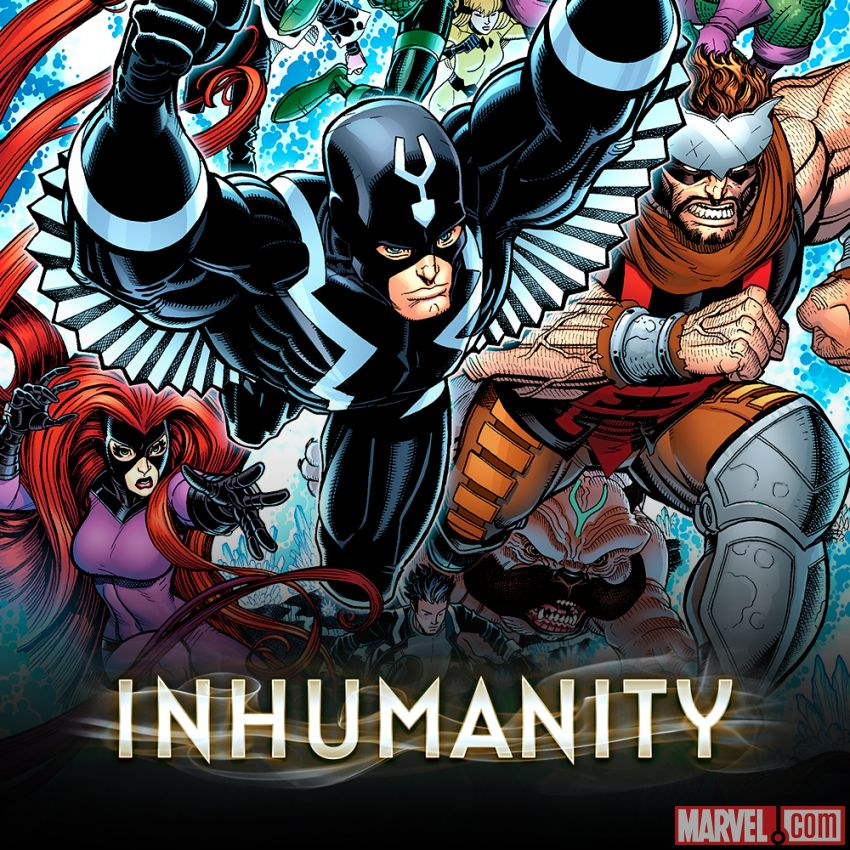

title: Inhumanity 
 id: 317 
 Description: Following Infinity, the actions of Black Bolt have affected not only his people, but the entire Marvel Universe, as a new race of Inhumans rises up! Witness change for every major Marvel character, led by Inhuman, a new series from Matt Fraction and Joe Madureira! 
----------------


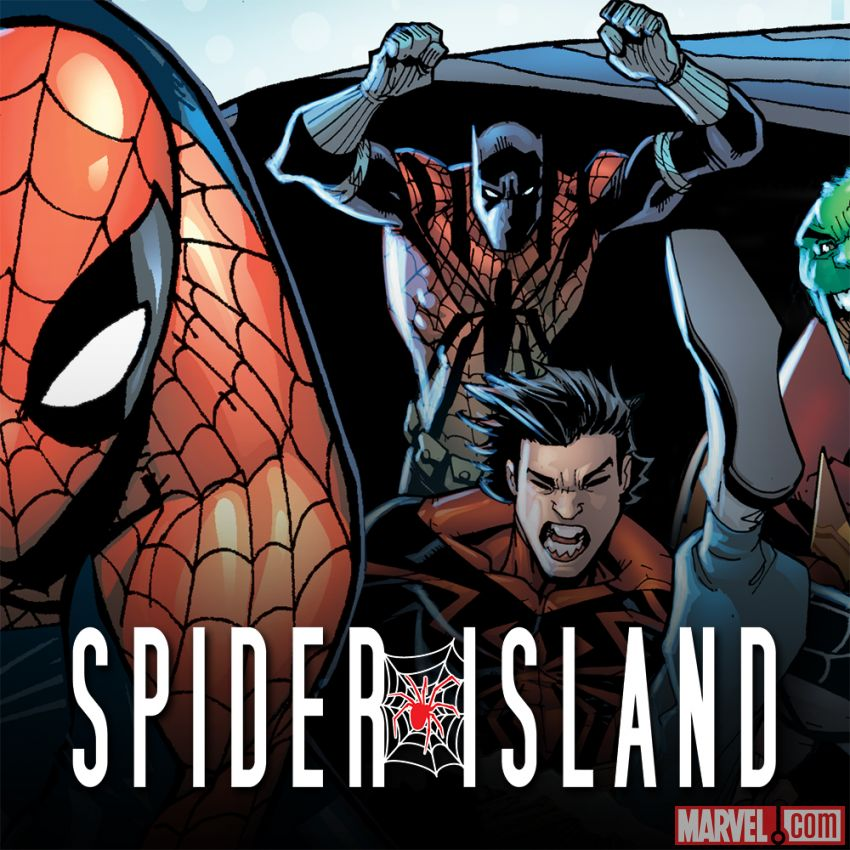

title: Spider-Island 
 id: 305 
 Description: This summer, heroes, villains and ordinary people across Manhattan gain spider abilities, but not all realize that with great power comes great responsibility! Can Spider-Man keep the peace? Dan Slott spearheads this arachna-tastic event in the pages of Amazing Spider-Man! 
----------------


In [4]:
limit = '100'
offset = 0
hero_id =  input("Hero's ID:")
# count = 1


md5key,ts = marvel.hashkey()
url =  "https://gateway.marvel.com:443/v1/public/characters/"\
       +hero_id+"/events?offset="+str(offset)+"&limit="+limit+"&ts="+ts+"&apikey="\
       +marvel.pbkey+"&hash="+md5key

print('Searching for events......\n')

hero_events = requests.get(url)
hero_events_j = json.loads(hero_events.text)

print('Events found:',hero_events_j['data']['total'])
print('Events got:',hero_events_j['data']['count'],'\n')

for events in hero_events_j['data']['results']:
    display(Image(str(events['thumbnail']['path'])+'.jpg'))
    print('title:',events['title'],'\n','id:',events['id'],'\n',\
          'Description:',events['description'],'\n----------------')
    